In [170]:
import sys
from pathlib import Path

sys.path.append(r"/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from data_analysis.data_fetcher.data_fetcher_class import DataFetcher
from data_collection.consts import  DB_PARAMS

In [171]:
fetcher = DataFetcher(DB_PARAMS)

Available regressors:
 - avg_default_verbolizer
 - avg_shrink_verbolizer
 - eps_surprise
 - f_size
 - full_list_default_verbolizer
 - full_list_shrink_verbolizer
 - hv_orig_score
 - lm_orig_score
 - max_abs_default
 - max_abs_shrink
 - max_default_verbolizer
 - max_shrink_verbolizer
 - md_hv1
 - md_hv2
 - md_hv3
 - md_lm1
 - md_lm2
 - md_lm3
 - min_default_verbolizer
 - min_shrink_verbolizer
 - stretch_default
 - stretch_shrink
Available sectors:
 - Technology (92)
 - Industrials (86)
 - Financial Services (85)
 - Healthcare (66)
 - Consumer Cyclical (58)
 - Consumer Defensive (40)
 - Real Estate (32)
 - Utilities (32)
 - Energy (30)
 - Basic Materials (23)
 - Communication Services (22)


/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:132: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:107: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [172]:
df_q = fetcher.fetch_data(
    regressors=['stretch_default'],
    report_filters={'report_type' : ['10-Q']},
    prepare_fixed_effects=True
    )

/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:164: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Expanding list regressor 'stretch_default' into 107 columns...


/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:211: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:226: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  companies_df = pd.read_sql_query(query, conn)


In [173]:
stds = {}

for col in df_q.columns:
    if col.startswith('segment_'):
        stds[col] = df_q[col].astype(float).std()

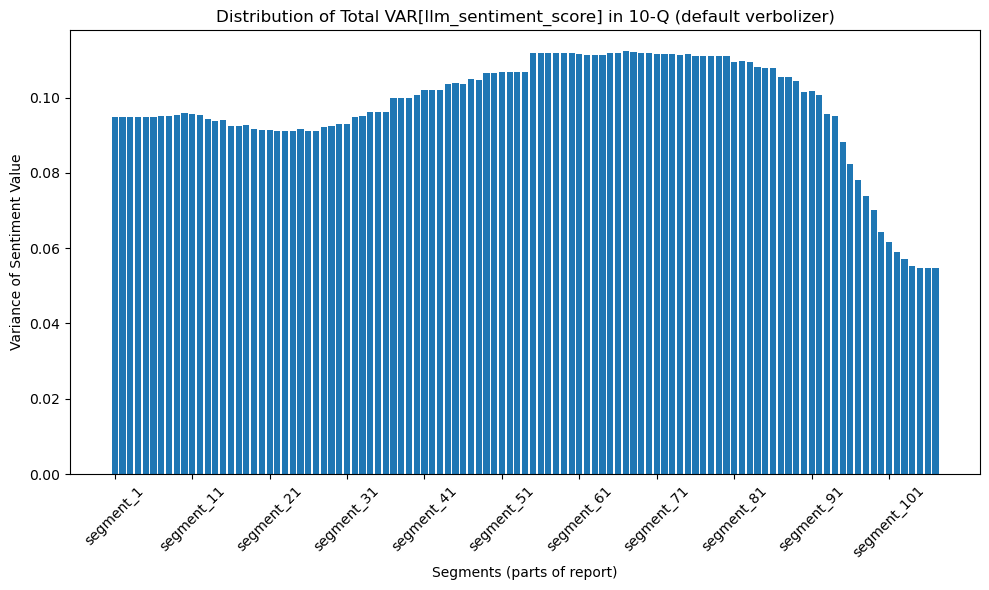

In [174]:
keys = list(stds.keys())
values = list(stds.values())

plt.figure(figsize=(10, 6))
plt.bar(keys, values)

# Labeling
plt.xlabel('Segments (parts of report)')
plt.ylabel('Variance of Sentiment Value')
plt.title('Distribution of Total VAR[llm_sentiment_score] in 10-Q (default verbolizer)')
plt.xticks(
    ticks=[i for i in range(len(keys)) if i % 10 == 0],
    labels=[keys[i] for i in range(len(keys)) if i % 10 == 0],
    rotation=45,
    fontsize=10
)  
plt.tight_layout()

# Display the plot
plt.show()

In [175]:
stds = {}

segment_cols = [col for col in df_q.columns if col.startswith('segment_')]

df_q[segment_cols] = df_q[segment_cols].astype(float)

grouped = df_q.groupby(level='company') #AVERAGED WITHIN VARIATION

for col in segment_cols:
    stds[col] = grouped[col].std().mean()  

In [176]:
grouped[segment_cols].std()

,segment_1,segment_2,segment_3,segment_4,segment_5,segment_6,segment_7,segment_8,segment_9,segment_10,...,segment_98,segment_99,segment_100,segment_101,segment_102,segment_103,segment_104,segment_105,segment_106,segment_107
company,,,,,,,,,,,,,,,,,,,,,
A,0.095645,0.095645,0.095645,0.095645,0.095645,0.095645,0.095645,0.095645,0.095645,0.095645,...,0.046777,0.046777,0.046777,0.046777,0.046777,0.046777,0.046777,0.046777,0.046777,0.046777
AAPL,0.089090,0.089090,0.089090,0.089090,0.089090,0.089090,0.089090,0.089090,0.089090,0.089090,...,0.041032,0.041032,0.041032,0.041032,0.041032,0.041032,0.041032,0.041032,0.041032,0.041032
ABBV,0.088368,0.088368,0.088368,0.088368,0.088368,0.088368,0.088368,0.088368,0.088368,0.088368,...,0.020955,0.020955,0.020955,0.020955,0.020955,0.020955,0.020955,0.020955,0.020955,0.020955
ABNB,0.073465,0.073465,0.073465,0.073465,0.073465,0.073465,0.073465,0.073465,0.073465,0.073465,...,0.031300,0.031300,0.031300,0.031300,0.031300,0.031300,0.031300,0.031300,0.031300,0.031300
ABT,0.056315,0.056315,0.056315,0.056315,0.056315,0.056315,0.056315,0.056315,0.056315,0.056315,...,0.054949,0.054949,0.054949,0.054949,0.054949,0.054949,0.054949,0.054949,0.054949,0.054949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.070385,0.070385,0.070385,0.070385,0.070385,0.070385,0.070385,0.070385,0.070385,0.070385,...,0.033808,0.033808,0.033808,0.033808,0.033808,0.033808,0.033808,0.033808,0.033808,0.033808
YUM,0.103111,0.103111,0.103111,0.103111,0.103111,0.103111,0.103111,0.103111,0.103111,0.103111,...,0.033753,0.033753,0.033753,0.033753,0.033753,0.033753,0.033753,0.033753,0.033753,0.033753
ZBH,0.116805,0.116805,0.116805,0.116805,0.116805,0.116805,0.116805,0.116805,0.116805,0.116805,...,0.054777,0.054777,0.054777,0.054777,0.054777,0.054777,0.054777,0.054777,0.054777,0.054777


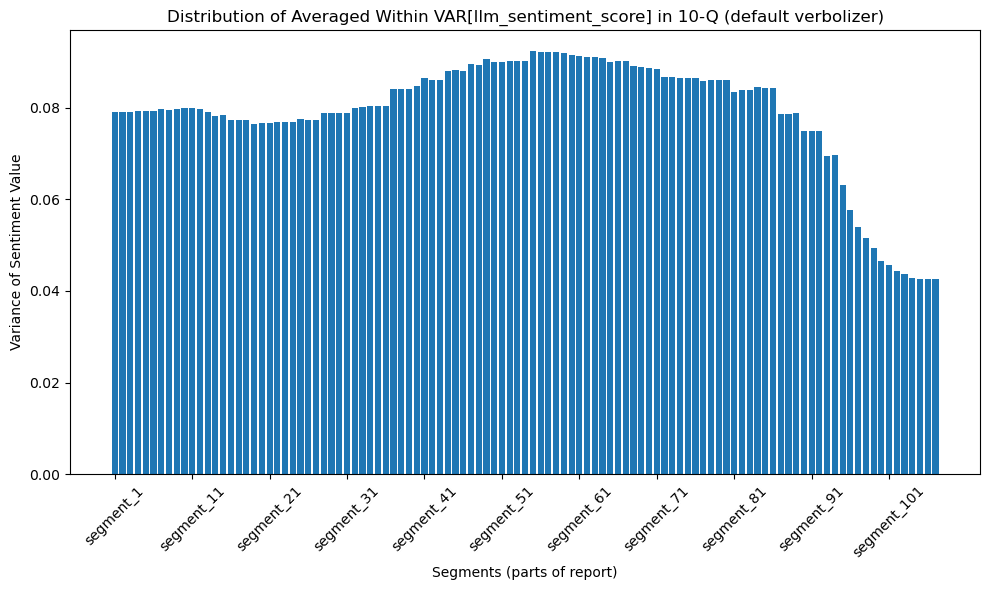

In [177]:
keys = list(stds.keys())
values = list(stds.values())

plt.figure(figsize=(10, 6))
plt.bar(keys, values)

# Labeling
plt.xlabel('Segments (parts of report)')
plt.ylabel('Variance of Sentiment Value')
plt.title('Distribution of Averaged Within VAR[llm_sentiment_score] in 10-Q (default verbolizer)')
plt.xticks(
    ticks=[i for i in range(len(keys)) if i % 10 == 0],
    labels=[keys[i] for i in range(len(keys)) if i % 10 == 0],
    rotation=45,
    fontsize=10
)  
plt.tight_layout()

# Display the plot
plt.show()

In [178]:
stds = {}

segment_cols = [col for col in df_q.columns if col.startswith('segment_')]

df_q[segment_cols] = df_q[segment_cols].astype(float)

grouped = df_q.groupby(level='date') #AVERAGED BETWEEN VARIATION

for col in segment_cols:
    stds[col] = grouped[col].std().mean()  


In [179]:
grouped[segment_cols].std()

,segment_1,segment_2,segment_3,segment_4,segment_5,segment_6,segment_7,segment_8,segment_9,segment_10,...,segment_98,segment_99,segment_100,segment_101,segment_102,segment_103,segment_104,segment_105,segment_106,segment_107
date,,,,,,,,,,,,,,,,,,,,,
2018.1,0.096633,0.096633,0.096633,0.096633,0.096212,0.095826,0.095815,0.096305,0.096413,0.096390,...,0.066963,0.064229,0.058517,0.055743,0.054732,0.053591,0.049869,0.049869,0.049869,0.049869
2018.2,0.103741,0.103741,0.103741,0.102836,0.102577,0.101809,0.102403,0.103186,0.104603,0.103736,...,0.081874,0.078321,0.072074,0.068677,0.065077,0.059460,0.053570,0.051241,0.051241,0.051241
2018.3,0.102349,0.102349,0.102349,0.102064,0.102672,0.102556,0.104583,0.103696,0.104752,0.103517,...,0.078642,0.076764,0.068695,0.065087,0.058576,0.053161,0.052206,0.051503,0.051503,0.051503
2018.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019.1,0.098796,0.098796,0.098796,0.098796,0.098955,0.098793,0.098797,0.097501,0.097226,0.098062,...,0.069581,0.066384,0.059029,0.055590,0.054940,0.052157,0.051684,0.051684,0.051684,0.051684
2019.2,0.091971,0.091971,0.091971,0.091187,0.090977,0.090760,0.091546,0.091730,0.092223,0.092043,...,0.072351,0.072075,0.066698,0.062082,0.059224,0.057587,0.055386,0.055236,0.055236,0.055236
2019.3,0.092399,0.092399,0.092399,0.090963,0.090639,0.090722,0.092077,0.092303,0.093922,0.095215,...,0.073914,0.071250,0.064095,0.061032,0.060124,0.055978,0.052624,0.051973,0.051973,0.051973
2020.1,0.101464,0.101464,0.101464,0.101464,0.101755,0.102266,0.101202,0.101632,0.100565,0.100446,...,0.081470,0.076426,0.073484,0.069133,0.066224,0.064508,0.064228,0.064228,0.064228,0.064228
2020.2,0.105010,0.105010,0.105010,0.104778,0.104527,0.105089,0.105057,0.104761,0.104298,0.105266,...,0.082527,0.078386,0.074275,0.070712,0.066928,0.065706,0.062923,0.060388,0.060388,0.060388


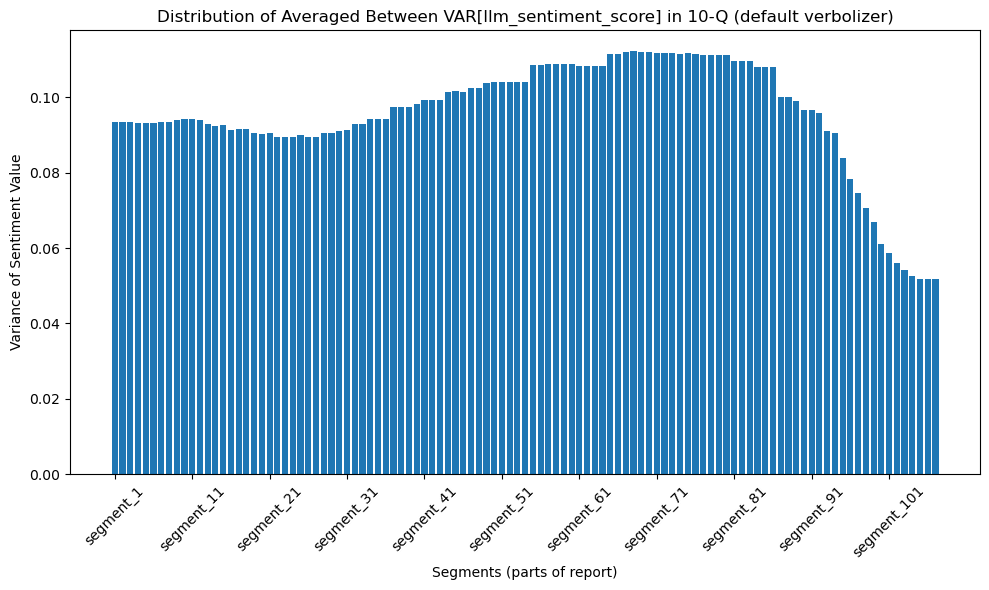

In [180]:
keys = list(stds.keys())
values = list(stds.values())

plt.figure(figsize=(10, 6))
plt.bar(keys, values)

# Labeling
plt.xlabel('Segments (parts of report)')
plt.ylabel('Variance of Sentiment Value')
plt.title('Distribution of Averaged Between VAR[llm_sentiment_score] in 10-Q (default verbolizer)')
plt.xticks(
    ticks=[i for i in range(len(keys)) if i % 10 == 0],
    labels=[keys[i] for i in range(len(keys)) if i % 10 == 0],
    rotation=45,
    fontsize=10
)  
plt.tight_layout()

# Display the plot
plt.show()

In [181]:
df_k = fetcher.fetch_data(
    regressors=['stretch_default'],
    report_filters={'report_type' : ['10-K']},
    prepare_fixed_effects=True
    )

/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:164: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Expanding list regressor 'stretch_default' into 107 columns...


/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:211: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:226: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  companies_df = pd.read_sql_query(query, conn)


In [182]:
stds = {}

for col in df_q.columns:
    if col.startswith('segment_'):
        #print(col, type(df_q[col].iloc[0]))
        stds[col] = df_k[col].astype(float).std()

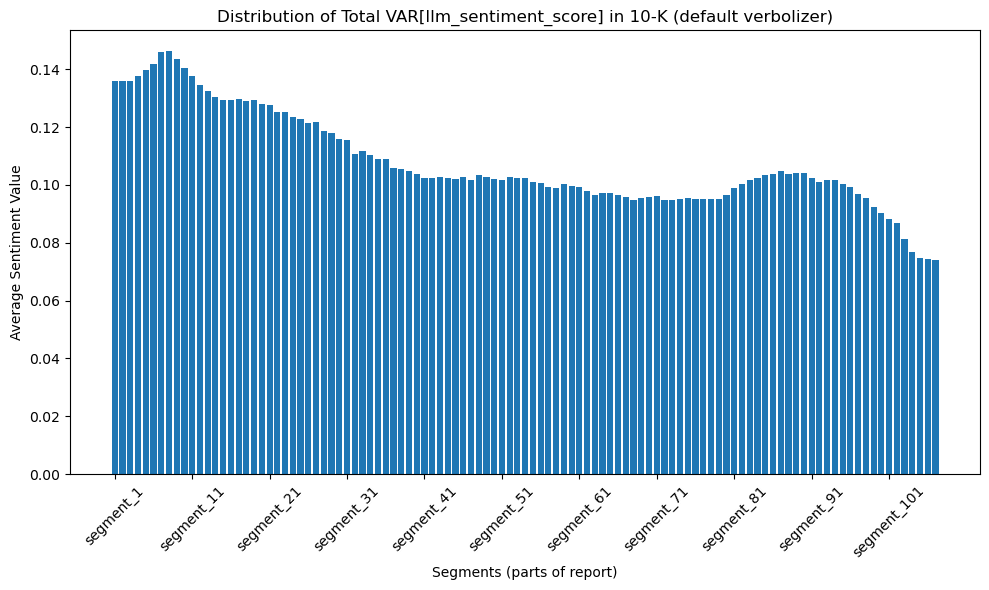

In [183]:
keys = list(stds.keys())
values = list(stds.values())

plt.figure(figsize=(10, 6))
plt.bar(keys, values)

# Labeling
plt.xlabel('Segments (parts of report)')
plt.ylabel('Average Sentiment Value')
plt.title('Distribution of Total VAR[llm_sentiment_score] in 10-K (default verbolizer)')
plt.xticks(
    ticks=[i for i in range(len(keys)) if i % 10 == 0],
    labels=[keys[i] for i in range(len(keys)) if i % 10 == 0],
    rotation=45,
    fontsize=10
)  
plt.tight_layout()

# Display the plot
plt.show()

In [184]:
stds = {}

segment_cols = [col for col in df_k.columns if col.startswith('segment_')]

df_k[segment_cols] = df_k[segment_cols].astype(float)

grouped = df_k.groupby(level='company') #AVERAGED WITHIN VARIATION

for col in segment_cols:
    stds[col] = grouped[col].std().mean()  

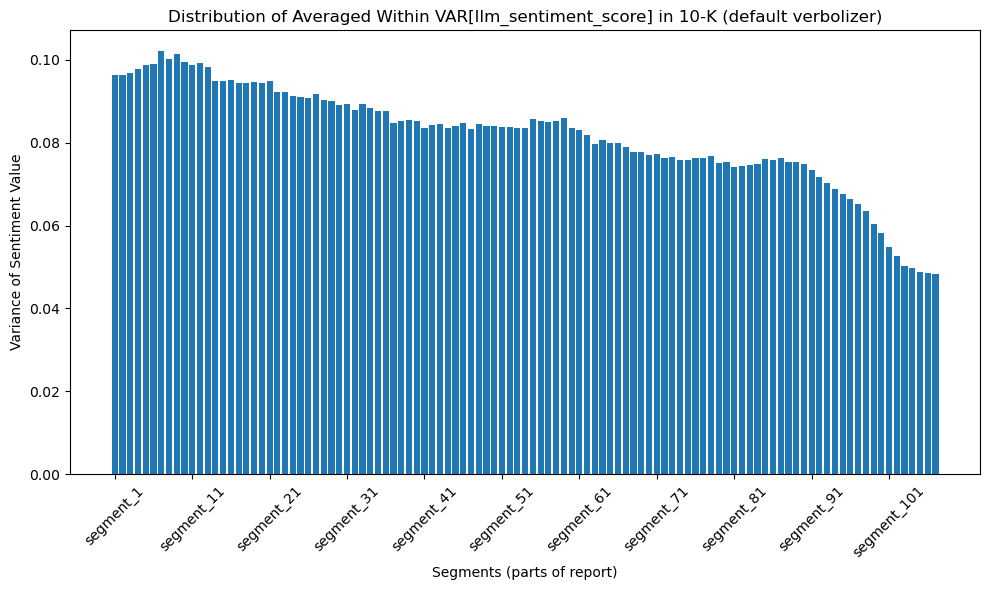

In [185]:
keys = list(stds.keys())
values = list(stds.values())

plt.figure(figsize=(10, 6))
plt.bar(keys, values)

# Labeling
plt.xlabel('Segments (parts of report)')
plt.ylabel('Variance of Sentiment Value')
plt.title('Distribution of Averaged Within VAR[llm_sentiment_score] in 10-K (default verbolizer)')
plt.xticks(
    ticks=[i for i in range(len(keys)) if i % 10 == 0],
    labels=[keys[i] for i in range(len(keys)) if i % 10 == 0],
    rotation=45,
    fontsize=10
)  
plt.tight_layout()

# Display the plot
plt.show()

In [186]:
stds = {}

segment_cols = [col for col in df_k.columns if col.startswith('segment_')]

df_k[segment_cols] = df_k[segment_cols].astype(float)

grouped = df_k.groupby(level='date') #AVERAGED BETWEEN VARIATION

for col in segment_cols:
    stds[col] = grouped[col].std().mean()  

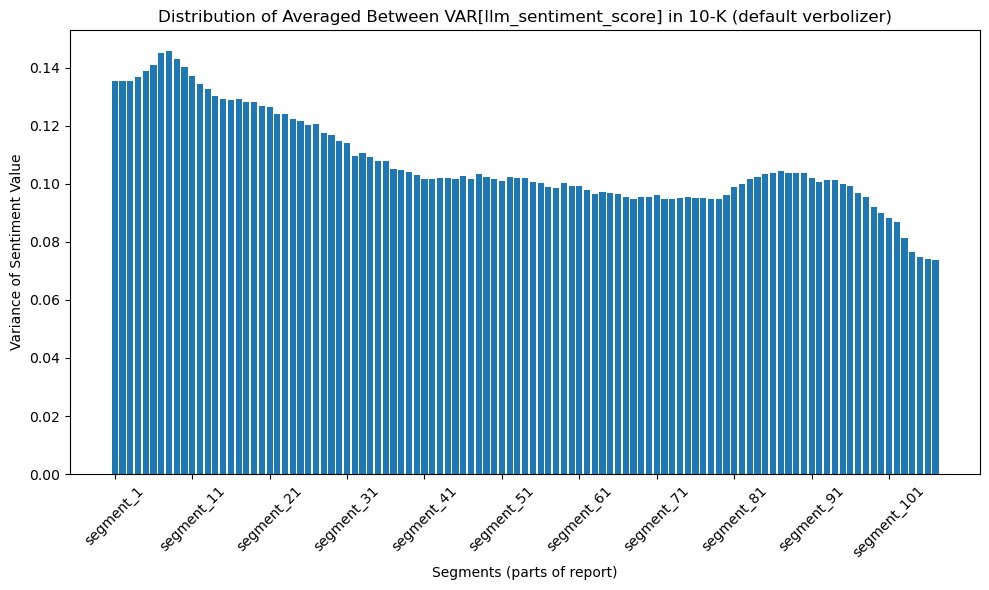

In [187]:
keys = list(stds.keys())
values = list(stds.values())

plt.figure(figsize=(10, 6))
plt.bar(keys, values)

# Labeling
plt.xlabel('Segments (parts of report)')
plt.ylabel('Variance of Sentiment Value')
plt.title('Distribution of Averaged Between VAR[llm_sentiment_score] in 10-K (default verbolizer)')
plt.xticks(
    ticks=[i for i in range(len(keys)) if i % 10 == 0],
    labels=[keys[i] for i in range(len(keys)) if i % 10 == 0],
    rotation=45,
    fontsize=10
)  
plt.tight_layout()

# Display the plot
plt.show()